Text(0.3, 0.3, '한글')

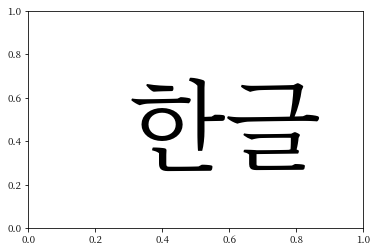

In [2]:
# 한글글꼴 경로 확인
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

import matplotlib
import matplotlib.pyplot as plt

# 근데 우분투 한글 기본 글꼴이 이거였어???
path = '/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc'
font_name = fm.FontProperties(fname=path).get_name()
matplotlib.rc('font', family=font_name)
plt.text(0.3, 0.3, '한글', size=100)

# import sklearn

# #나눔 폰트를 사용합니다.
# matplotlib.rc('font', family='NotoSerifCJK-Regular')
# matplotlib.rcParams['axes.unicode_minus'] = False

# # imshow 함수로 흑백 이미지를 출력하기 위해
# plt.rcParams['image.cmap'] = "gray"
# plt.text(0.3, 0.3, '한글', size=100)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [5]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
svm = SVC()
svm.fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
print("테스트점수: {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트점수: 0.97


In [6]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도: {:.2f}".format(grid.best_score_))
print("테스트점수: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수: ", grid.best_params_)

최상의 교차 검증 정확도: 0.98
테스트점수: 0.97
최적의 매개변수:  {'C': 1, 'gamma': 1}


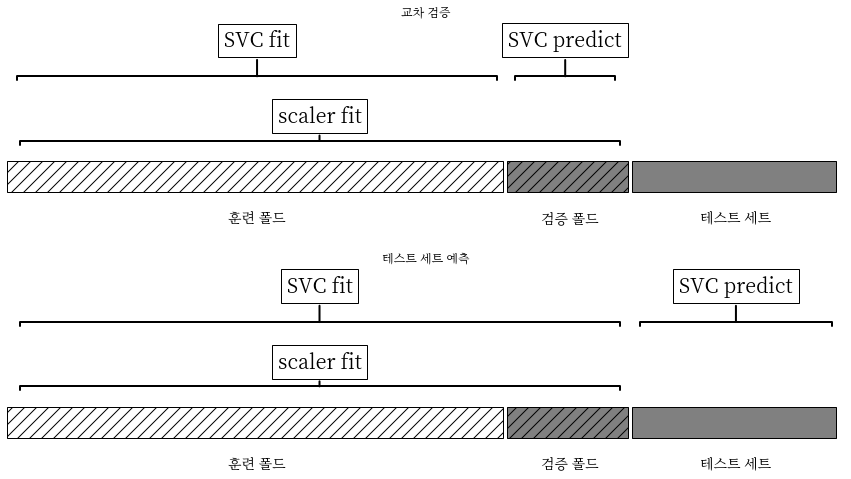

In [8]:
mglearn.plots.plot_improper_processing()
# 무슨 뜻인지는 대충 감이 오는데... 앞 예제에서 교차 검증의 SVC predict, 테스트 세트 예측의 SVC fit, SVC predict, scaler fit이 명확하지 않다.
# 어쨌든 여기에는 predict()를 쓰지 않았으니까 걔네는 빼고 생각하면 되는거 아닐까?
# 테스트 세트 평가는 score()로 한다고 함....

In [9]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])
pipe.fit(X_train, y_train)
print("테스트점수: {:.2f}".format(pipe.score(X_test, y_test)))

테스트점수: 0.97


In [11]:
param_grid = {'svm__C':[0.001, 0.01, 0.1, 1, 10, 100], 'svm__gamma':[0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("최상의 교차 검증 정확도: {:.2f}".format(grid.best_score_))
print("테스트점수: {:.2f}".format(grid.score(X_test, y_test)))
print("최적의 매개변수: ", grid.best_params_)
# 아니 그래도 이렇게 한 결과가 교차검증반복 밖에서 전처리가 될 때 데이터 사용 형태와 동일하다면... 
# 뭐가 다르다는거야???

최상의 교차 검증 정확도: 0.98
테스트점수: 0.97
최적의 매개변수:  {'svm__C': 1, 'svm__gamma': 1}


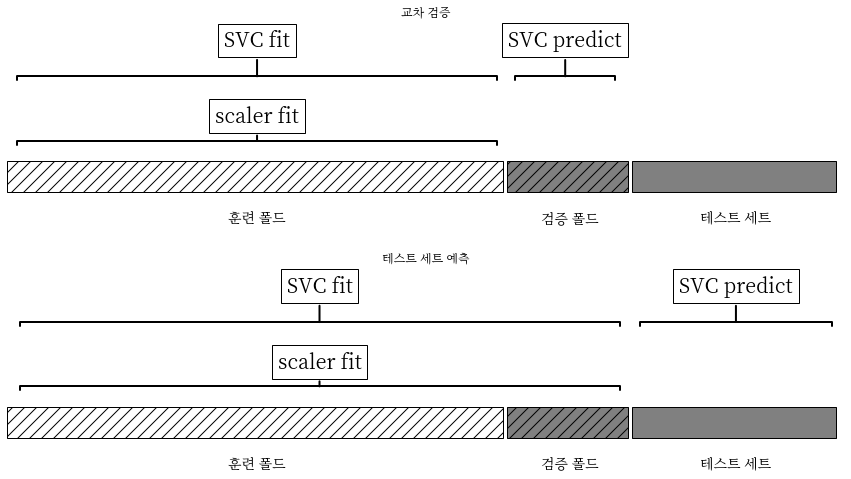

In [12]:
mglearn.plots.plot_proper_processing()

In [14]:
rnd = np.random.RandomState(seed=0)
X = rnd.normal(size=(100, 10000))
y = rnd.normal(size=(100,))


In [15]:
from sklearn.feature_selection import SelectPercentile, f_regression
select = SelectPercentile(score_func=f_regression, percentile=5).fit(X, y)
X_selected = select.transform(X)
print("X_selected.shape:", X_selected.shape)

X_selected.shape: (100, 500)


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
print("교차검증점수(리지): {:.2f}".format(np.mean(cross_val_score(Ridge(), X_selected, y, cv=5))))

교차검증점수(리지): 0.91


In [18]:
pipe = Pipeline([('select', SelectPercentile(score_func=f_regression, percentile=5)), ('ridge', Ridge())])
print("교차검증점수(파이프): {:.2f}".format(np.mean(cross_val_score(pipe, X, y, cv=5))))
# 이 결과가 맞지...

교차검증점수(파이프): -0.25


In [19]:
def fit(self, X, y):
    X_transformed = X
    for name, estimator in self.steps[:-1]:
        X_transformed = estimator.fit_transform(X_transformed, y)
    self.steps[-1][1].fit(X_transformed, y)
    return self

In [20]:
def predict(self, X):
    X_transformed = X
    for step in self.steps[:-1]:
        X_transformed = step[1].transform(X_transformed)
    return self.steps[-1][1].predict(X_transformed)

In [22]:
from sklearn import set_config
set_config(display='diagram')
pipe

Pipeline(steps=[('select',
                 SelectPercentile(percentile=5,
                                  score_func=<function f_regression at 0x7f9001345820>)),
                ('ridge', Ridge())])

In [23]:
from sklearn.pipeline import make_pipeline
pipe_long = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC(C=100))])
pipe_short = make_pipeline(MinMaxScaler(), SVC(C=100))

In [26]:
print("파이프라인 단계:\n", pipe_short.steps)

파이프라인 단계:
 [('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pipe = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())
print("파이프라인 단계:\n", pipe.steps)

파이프라인 단계:
 [('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


In [31]:
pipe.fit(cancer.data)
# cancer.data.shape (569, 30)

components = pipe.named_steps["pca"].components_ 
print("components.shape: ", components.shape)
# components.shape:  (2, 30)
# 맞아 pca의 주목적은 차원 축소! 두개의 성분만 추출하는 거였지!

components.shape:  (2, 30)


In [34]:
from sklearn.linear_model import LogisticRegression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

In [35]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=4)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [38]:
print("최상의 모델:\n", grid.best_estimator_)
print("로지스틱 회귀 단계:\n", grid.best_estimator_.named_steps["logisticregression"])
print("로지스틱 회귀 계수:\n", grid.best_estimator_.named_steps["logisticregression"].coef_)

최상의 모델:
 Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])
로지스틱 회귀 단계:
 LogisticRegression(C=1, max_iter=1000)
로지스틱 회귀 계수:
 [[-0.43570655 -0.34266946 -0.40809443 -0.5344574  -0.14971847  0.61034122
  -0.72634347 -0.78538827  0.03886087  0.27497198 -1.29780109  0.04926005
  -0.67336941 -0.93447426 -0.13939555  0.45032641 -0.13009864 -0.10144273
   0.43432027  0.71596578 -1.09068862 -1.09463976 -0.85183755 -1.06406198
  -0.74316099  0.07252425 -0.82323903 -0.65321239 -0.64379499 -0.42026013]]


In [41]:
# boston 이렇게 사용할 수 있음!!!
# 보스턴 주택 데이터셋이 1.2 버전에서 삭제되므로 직접 다운로드합니다.
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=0)

from sklearn.preprocessing import PolynomialFeatures
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), Ridge())

In [42]:
param_grid = {'polynomialfeatures__degree':[1, 2, 3], 'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

In [43]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

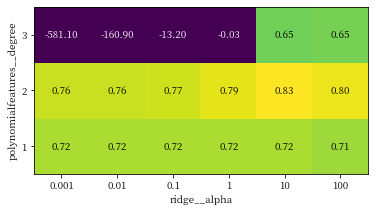

In [44]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3, -1), xlabel="ridge__alpha", ylabel="polynomialfeatures__degree", xticklabels=param_grid['ridge__alpha'], yticklabels=param_grid['polynomialfeatures__degree'], vmin=0)

In [46]:
print("최적의 매개변수:", grid.best_params_)

최적의 매개변수: {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}


In [47]:
print("테스트 세트 점수: {:.2f}".format(grid.score(X_test, y_test)))

테스트 세트 점수: 0.77


In [49]:
param_grid = {'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}
pipe = make_pipeline(StandardScaler(), Ridge())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("다항 특성이 없을 때 점수: {:.2f}".format(grid.score(X_test, y_test)))

다항 특성이 없을 때 점수: 0.63


In [50]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC())])

In [51]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [
    {'classifier':[SVC()], 'preprocessing':[StandardScaler()],
     'classifier__gamma':[0.001, 0.01, 0.1, 1, 10, 100], 'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100]},
    {'classifier':[RandomForestClassifier(n_estimators=100)], 'preprocessing':[None],
     'classifier__max_features': [1, 2, 3]}]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("최적의 매개변수:", grid.best_params_)
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("테스트 세트 점수: {:.2f}".format(grid.score(X_test, y_test)))

최적의 매개변수: {'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}
최상의 교차 검증 점수: 0.99
테스트 세트 점수: 0.98
